#Behandling av data

In [12]:
import sys

sys.path.append("../src")

from weather import analyze_weather_data, nedbør, temperatur

# Kall funksjonen for å hente data
resultater = analyze_weather_data()

# Ekstraher data fra resultater
korrelasjon = resultater["korrelasjon"]





##Her har vi visualisering av temperatur:

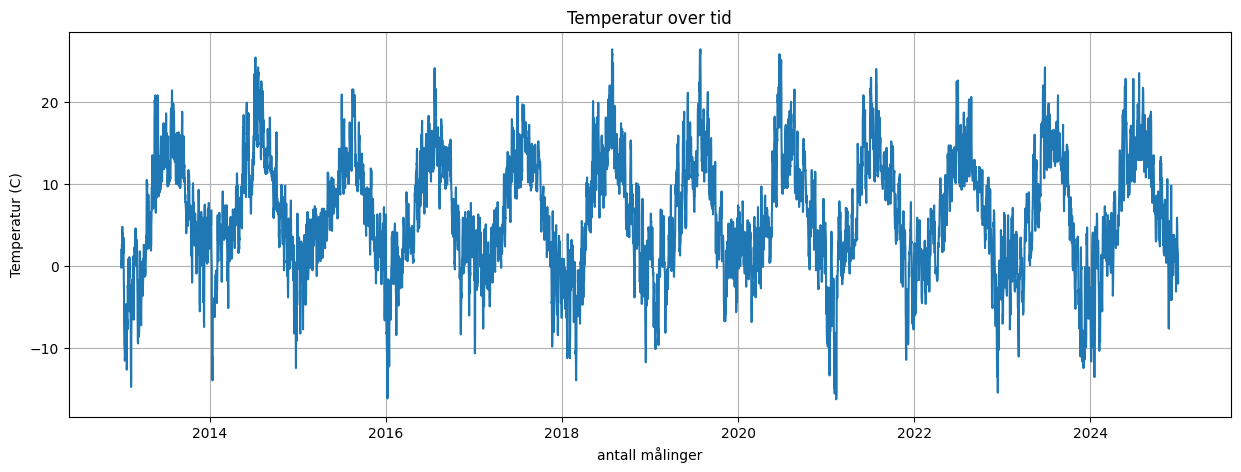

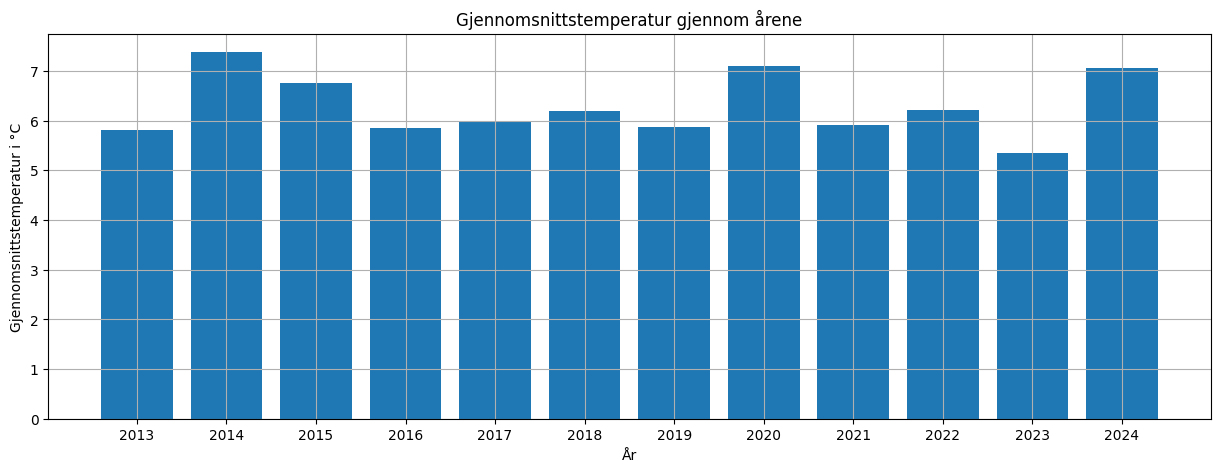

Gjennomsnittstemperaturen er: 6.25 °C
Median temperaturen er: 5.9 °C
Standardavviket til temperaturen er: 7 °C


In [13]:

temperatur(resultater)

Av den graf 1 ser vi et tydelig mønster, og vi ser tydelig hva som er sommer og hva som er vinter. Av figur 2 ser vi litt variasjon fra år til år, noe som vil være naturlig. Ellers ser vi også at det er lite økning totalt sett gjennom de 12 årene. Et standardavvik på 7°C og gjennomsnittstemperaturen er på 6.25°C betyr at de fleste temperaturverdiene ligger mellom -0.75°C og 13.25°C. Med et såpass høyt standardavvik tyder det på store sesongvariasjoner i temperaturen, noe vi kan bekrefte med figur 1.

##Her har vi en visualisering av nedbøren

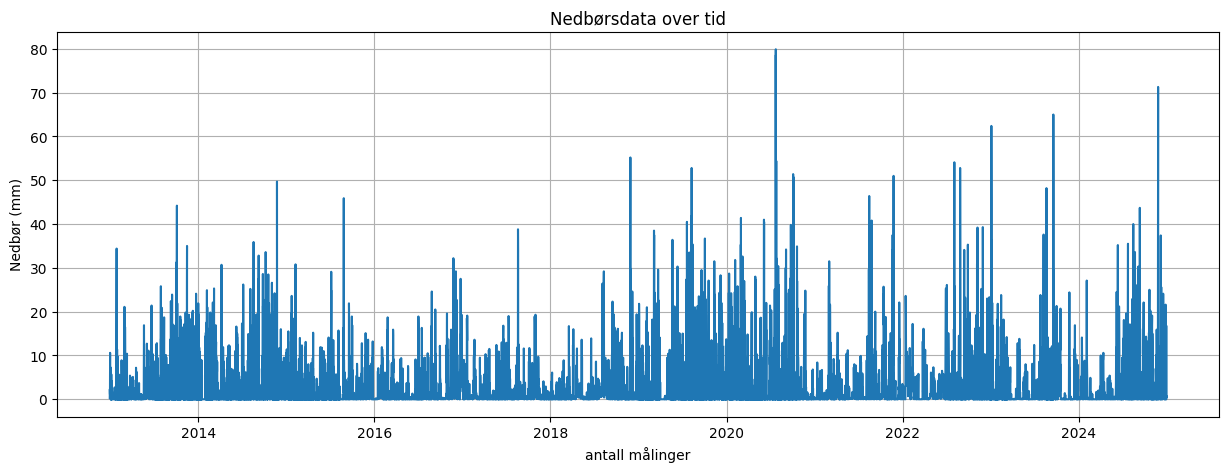

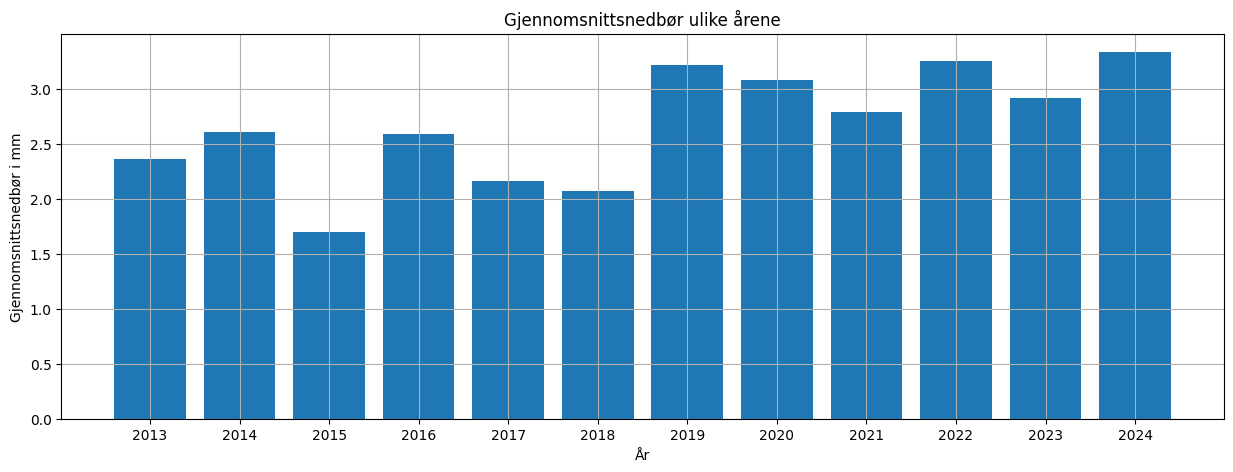

Gjennomsnittsnedbøren er: 2.65 mm
Median nedbøren er: 0.2 mm
Standardavviket til nedbøren er: 6 mm


In [2]:
nedbør(resultater)

Vi ser av figur 4 at nedbøren har økt litt de siste årene